In [4]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar100
from tensorflow.keras.applications import ResNet50, VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
from sklearn.metrics import classification_report
from tensorflow.keras.utils import to_categorical

import numpy as np
import matplotlib.pyplot as plt

In [18]:
# Load CIFAR-100 dataset
(x_train, y_train), (x_test, y_test) = cifar100.load_data()
num_classes = 100

# Preprocess the data
x_train = x_train / 255.0
x_test = x_test / 255.0
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)


# Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)
datagen.fit(x_train)


# Define a simple CNN model
cnn_model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

# Pre-trained models
resnet_model = ResNet50(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
vgg16_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))


# Build models on top of pre-trained models
def build_model(base_model):
    model = models.Sequential()
    model.add(base_model)
    model.add(layers.GlobalAveragePooling2D())
    model.add(layers.Dense(256, activation='relu'))
    model.add(layers.Dense(num_classes, activation='softmax'))
    return model

resnet_model = build_model(resnet_model)
vgg16_model = build_model(vgg16_model)

# Compile models
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
resnet_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
vgg16_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train models
batch_size = 64
epochs = 15
resnet_model.fit(datagen.flow(x_train, y_train, batch_size=batch_size), epochs=epochs, validation_data=(x_test, y_test))
vgg16_model.fit(datagen.flow(x_train, y_train, batch_size=batch_size), epochs=epochs, validation_data=(x_test, y_test))
cnn_model.fit(datagen.flow(x_train, y_train, batch_size=batch_size), epochs=epochs, validation_data=(x_test, y_test))


# Model evaluation
def evaluate_model(model, x_test, y_test):
    scores = model.evaluate(x_test, y_test, verbose=0)
    print(f"Test Accuracy: {scores[1]*100:.2f}%")

print("ResNet50 Model Evaluation:")
evaluate_model(resnet_model, x_test, y_test)

print("\nVGG16 Model Evaluation:")
evaluate_model(vgg16_model, x_test, y_test)

print("\nCNN Model Evaluation:")
evaluate_model(cnn_model, x_test, y_test)

Epoch 1/15
782/782 [==============================] - 100s 86ms/step - loss: 3.7910 - accuracy: 0.1243 - val_loss: 5.4642 - val_accuracy: 0.0459
Epoch 2/15
782/782 [==============================] - 63s 81ms/step - loss: 3.3267 - accuracy: 0.1893 - val_loss: 5.1075 - val_accuracy: 0.0952
Epoch 3/15
782/782 [==============================] - 63s 81ms/step - loss: 3.1050 - accuracy: 0.2280 - val_loss: 4.1483 - val_accuracy: 0.1192
Epoch 4/15
782/782 [==============================] - 65s 84ms/step - loss: 3.0793 - accuracy: 0.2342 - val_loss: 3.6722 - val_accuracy: 0.1767
Epoch 5/15
782/782 [==============================] - 63s 81ms/step - loss: 2.8655 - accuracy: 0.2753 - val_loss: 4.4030 - val_accuracy: 0.1416
Epoch 6/15
782/782 [==============================] - 66s 84ms/step - loss: 2.8823 - accuracy: 0.2737 - val_loss: 4.0930 - val_accuracy: 0.1553
Epoch 7/15
782/782 [==============================] - 66s 84ms/step - loss: 2.7945 - accuracy: 0.2872 - val_loss: 3.1524 - val_accuracy

In [19]:
from tensorflow.keras import models, layers
num_classes = 100
# Define a simple CNN model with two additional layers
cnn_model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

# Rest of the code remains the same
batch_size = 64
epochs = 30

cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
cnn_model.fit(datagen.flow(x_train, y_train, batch_size=batch_size), epochs=epochs, validation_data=(x_test, y_test))

print("\nCNN Model Evaluation:")
evaluate_model(cnn_model, x_test, y_test)


Epoch 1/30
782/782 [==============================] - 36s 44ms/step - loss: 4.0773 - accuracy: 0.0718 - val_loss: 3.6108 - val_accuracy: 0.1500
Epoch 2/30
782/782 [==============================] - 34s 44ms/step - loss: 3.5587 - accuracy: 0.1537 - val_loss: 3.3011 - val_accuracy: 0.2019
Epoch 3/30
782/782 [==============================] - 35s 44ms/step - loss: 3.3322 - accuracy: 0.1937 - val_loss: 3.0768 - val_accuracy: 0.2418
Epoch 4/30
782/782 [==============================] - 34s 44ms/step - loss: 3.1848 - accuracy: 0.2216 - val_loss: 2.9713 - val_accuracy: 0.2592
Epoch 5/30
782/782 [==============================] - 36s 46ms/step - loss: 3.0759 - accuracy: 0.2420 - val_loss: 2.8567 - val_accuracy: 0.2819
Epoch 6/30
782/782 [==============================] - 34s 43ms/step - loss: 2.9869 - accuracy: 0.2565 - val_loss: 2.7815 - val_accuracy: 0.2985
Epoch 7/30
782/782 [==============================] - 34s 43ms/step - loss: 2.9111 - accuracy: 0.2723 - val_loss: 2.7017 - val_accuracy:

In [5]:
# Load CIFAR-100 dataset
(x_train, y_train), (x_test, y_test) = cifar100.load_data()
num_classes = 100

# Preprocess the data
x_train = x_train / 255.0
x_test = x_test / 255.0
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)


# Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)
datagen.fit(x_train)


# Define a simple CNN model
cnn_model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

# Pre-trained models
resnet_model = ResNet50(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
vgg16_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))


# Build models on top of pre-trained models
def build_model(base_model):
    model = models.Sequential()
    model.add(base_model)
    model.add(layers.GlobalAveragePooling2D())
    model.add(layers.Dense(256, activation='relu'))
    model.add(layers.Dense(num_classes, activation='softmax'))
    return model

resnet_model = build_model(resnet_model)
vgg16_model = build_model(vgg16_model)

# Compile models
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
resnet_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
vgg16_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train models
batch_size = 64
epochs = 1
resnet_model.fit(datagen.flow(x_train, y_train, batch_size=batch_size), epochs=epochs, validation_data=(x_test, y_test))
vgg16_model.fit(datagen.flow(x_train, y_train, batch_size=batch_size), epochs=epochs, validation_data=(x_test, y_test))
cnn_model.fit(datagen.flow(x_train, y_train, batch_size=batch_size), epochs=epochs, validation_data=(x_test, y_test))


# Model evaluation
def evaluate_model(model, x_test, y_test):
    scores = model.evaluate(x_test, y_test, verbose=0)
    print(f"Test Accuracy: {scores[1]*100:.2f}%")

print("ResNet50 Model Evaluation:")
evaluate_model(resnet_model, x_test, y_test)

print("\nVGG16 Model Evaluation:")
evaluate_model(vgg16_model, x_test, y_test)

print("\nCNN Model Evaluation:")
evaluate_model(cnn_model, x_test, y_test)

782/782 [==============================] - 39s 47ms/step - loss: 4.0330 - accuracy: 0.0777 - val_loss: 3.6606 - val_accuracy: 0.1288
ResNet50 Model Evaluation:
Test Accuracy: 5.76%

VGG16 Model Evaluation:
Test Accuracy: 3.56%

CNN Model Evaluation:
Test Accuracy: 12.88%


In [7]:
vgg16_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 global_average_pooling2d_1  (None, 512)               0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_4 (Dense)             (None, 256)               131328    
                                                                 
 dense_5 (Dense)             (None, 100)               25700     
                                                                 
Total params: 14871716 (56.73 MB)
Trainable params: 14871716 (56.73 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [6]:
resnet_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 1, 1, 2048)        23587712  
                                                                 
 global_average_pooling2d (  (None, 2048)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense_2 (Dense)             (None, 256)               524544    
                                                                 
 dense_3 (Dense)             (None, 100)               25700     
                                                                 
Total params: 24137956 (92.08 MB)
Trainable params: 24084836 (91.88 MB)
Non-trainable params: 53120 (207.50 KB)
_________________________________________________________________


In [4]:
cnn_model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 2, 2, 128)        

In [20]:
import timeit
from skimage.util import random_noise

# Speed comparison
def measure_inference_speed(model, x_test):
    start_time = timeit.default_timer()
    model.predict(x_test[:10])  # Predict the first 10 samples for speed measurement
    elapsed_time = timeit.default_timer() - start_time
    print(f"Inference Speed: {10 / elapsed_time:.2f} samples per second")

print("\nResNet50 Speed Comparison:")
measure_inference_speed(resnet_model, x_test)

print("\nVGG16 Speed Comparison:")
measure_inference_speed(vgg16_model, x_test)

print("\CNN  Speed Comparison:")
measure_inference_speed(cnn_model, x_test)


ResNet50 Speed Comparison:
1/1 [==============================] - 1s 1s/step
Inference Speed: 9.09 samples per second

VGG16 Speed Comparison:
1/1 [==============================] - 0s 145ms/step
Inference Speed: 49.34 samples per second
\CNN  Speed Comparison:
1/1 [==============================] - 0s 71ms/step
Inference Speed: 87.20 samples per second


In [21]:
# Robustness testing
def introduce_noise(images, noise_level=0.1):
    noisy_images = np.zeros_like(images)
    for i in range(images.shape[0]):
        noisy_images[i] = random_noise(images[i], var=noise_level**2)
    return noisy_images

noisy_x_test = introduce_noise(x_test, noise_level=0.01)

def evaluate_robustness(model, x_test, y_test):
    scores = model.evaluate(x_test, y_test, verbose=0)
    print(f"Noisy Test Accuracy: {scores[1]*100:.2f}%")

print("\nResNet50 Robustness Testing:")
evaluate_robustness(resnet_model, noisy_x_test, y_test)

print("\nVGG16 Robustness Testing:")
evaluate_robustness(vgg16_model, noisy_x_test, y_test)

print("\nCNN Robustness Testing:")
evaluate_robustness(cnn_model, noisy_x_test, y_test)



ResNet50 Robustness Testing:
Noisy Test Accuracy: 34.63%

VGG16 Robustness Testing:
Noisy Test Accuracy: 26.05%

CNN Robustness Testing:
Noisy Test Accuracy: 41.69%


In [25]:
from google.colab import files
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input as resnet_preprocess_input
from tensorflow.keras.applications.vgg16 import preprocess_input as vgg16_preprocess_input
import matplotlib.pyplot as plt

# Function to load and preprocess a novel image
def load_and_preprocess_image(image_path, model_name):
    img = image.load_img(image_path, target_size=(32, 32))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)

    if model_name == 'resnet':
        img_array = resnet_preprocess_input(img_array)
    elif model_name == 'vgg16':
        img_array = vgg16_preprocess_input(img_array)
    elif model_name == 'cnn':
        # Assuming you have trained and saved the cnn_model
        img_array = img_array / 255.0  # Normalize pixel values to be between 0 and 1

    return img_array

# Upload your novel image to Colab
novel_image_uploaded = files.upload()

# Get the file name of the uploaded image
novel_image_path = list(novel_image_uploaded.keys())[0]

# Load and preprocess the novel image for ResNet50
novel_image_resnet = load_and_preprocess_image(novel_image_path, 'resnet')

# Load and preprocess the novel image for VGG16
novel_image_vgg16 = load_and_preprocess_image(novel_image_path, 'vgg16')

# Load and preprocess the novel image for your CNN model
novel_image_cnn = load_and_preprocess_image(novel_image_path, 'cnn')

cifar100_labels = [
    'apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle',
    'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 'can', 'castle', 'caterpillar', 'cattle',
    'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur',
    'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house', 'kangaroo', 'keyboard',
    'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain',
    'mouse', 'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear', 'pickup_truck', 'pine_tree',
    'plain', 'plate', 'poppy', 'porcupine', 'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose',
    'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake', 'spider', 'squirrel', 'streetcar',
    'sunflower', 'sweet_pepper', 'table', 'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout',
    'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman', 'worm'
]


def visualize_predictions_with_names(predictions, model_name):
    top_classes = np.argsort(predictions[0])[::-1][:5]  # Get indices of top 5 predicted classes
    top_probabilities = predictions[0][top_classes]

    print(f"\nTop Predicted Classes for {model_name.capitalize()} Model:")
    for i in range(len(top_classes)):
        class_name = cifar100_labels[top_classes[i]]
        probability = top_probabilities[i]
        print(f"{i + 1}. {class_name}: {probability:.2%}")

# Rest of your code...

# Novel image testing
def evaluate_novel_image(model, novel_image, model_name):
    predictions = model.predict(novel_image)
    predicted_class = np.argmax(predictions)

    print(f"\n{model_name.capitalize()} Model Prediction:")
    print(f"Predicted Class: {cifar100_labels[predicted_class]}")

    # Visualize top predicted classes
    visualize_predictions_with_names(predictions, model_name)

# Evaluate novel image with ResNet50
evaluate_novel_image(resnet_model, novel_image_resnet, 'resnet')

# Evaluate novel image with VGG16
evaluate_novel_image(vgg16_model, novel_image_vgg16, 'vgg16')

# Evaluate novel image with your CNN model
evaluate_novel_image(cnn_model, novel_image_cnn, 'cnn')


Saving APPLE.png to APPLE (4).png
1/1 [==============================] - 0s 39ms/step

Resnet Model Prediction:
Predicted Class: poppy

Top Predicted Classes for Resnet Model:
1. poppy: 1.46%
2. rose: 1.31%
3. tulip: 1.30%
4. sweet_pepper: 1.15%
5. aquarium_fish: 1.15%
1/1 [==============================] - 0s 34ms/step

Vgg16 Model Prediction:
Predicted Class: clock

Top Predicted Classes for Vgg16 Model:
1. clock: 100.00%
2. telephone: 0.00%
3. can: 0.00%
4. couch: 0.00%
5. crocodile: 0.00%
1/1 [==============================] - 0s 18ms/step

Cnn Model Prediction:
Predicted Class: apple

Top Predicted Classes for Cnn Model:
1. apple: 82.93%
2. pear: 6.26%
3. wardrobe: 2.96%
4. plate: 1.97%
5. bowl: 1.47%


In [26]:
# Novel image testing
# Load and preprocess novel images, then evaluate each model on these images.

# Comparison report
def generate_comparison_report(model, x_test, y_test):
    predictions = model.predict(x_test)
    y_pred = np.argmax(predictions, axis=1)
    y_true = np.argmax(y_test, axis=1)
    report = classification_report(y_true, y_pred, target_names=[str(i) for i in range(num_classes)])
    print(report)

print("\nResNet50 Comparison Report:")
generate_comparison_report(resnet_model, x_test, y_test)

print("\nVGG16 Comparison Report:")
generate_comparison_report(vgg16_model, x_test, y_test)

print("\nCNN Comparison Report:")
generate_comparison_report(cnn_model, x_test, y_test)




ResNet50 Comparison Report:
313/313 [==============================] - 3s 9ms/step
              precision    recall  f1-score   support

           0       0.59      0.74      0.66       100
           1       0.28      0.65      0.39       100
           2       0.32      0.27      0.29       100
           3       0.28      0.10      0.15       100
           4       0.18      0.11      0.14       100
           5       0.37      0.36      0.37       100
           6       0.54      0.19      0.28       100
           7       0.45      0.35      0.40       100
           8       0.34      0.54      0.42       100
           9       0.38      0.55      0.45       100
          10       0.33      0.31      0.32       100
          11       0.36      0.18      0.24       100
          12       0.22      0.43      0.29       100
          13       0.16      0.51      0.24       100
          14       0.20      0.23      0.21       100
          15       0.20      0.13      0.16       1

313/313 [==============================] - 1s 2ms/step


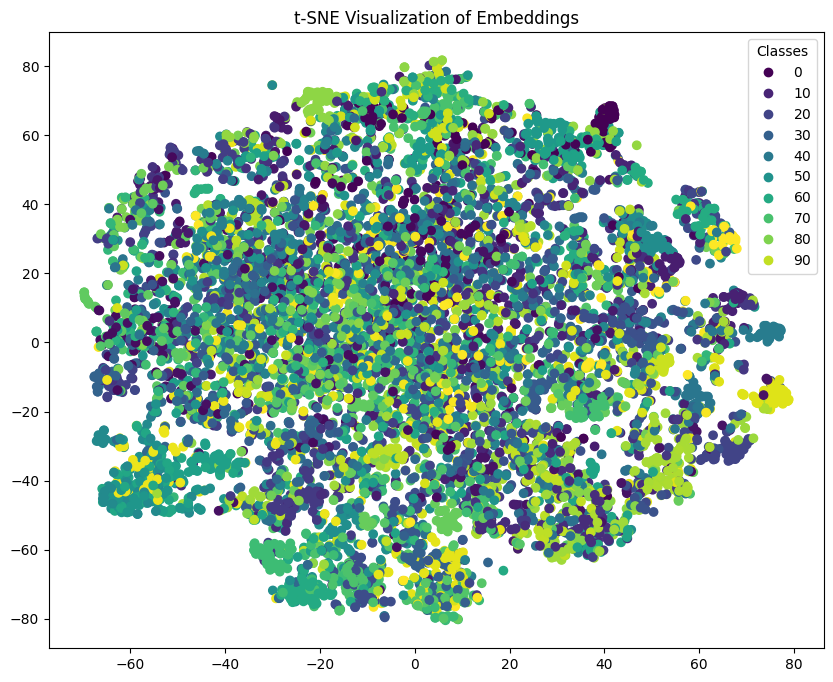

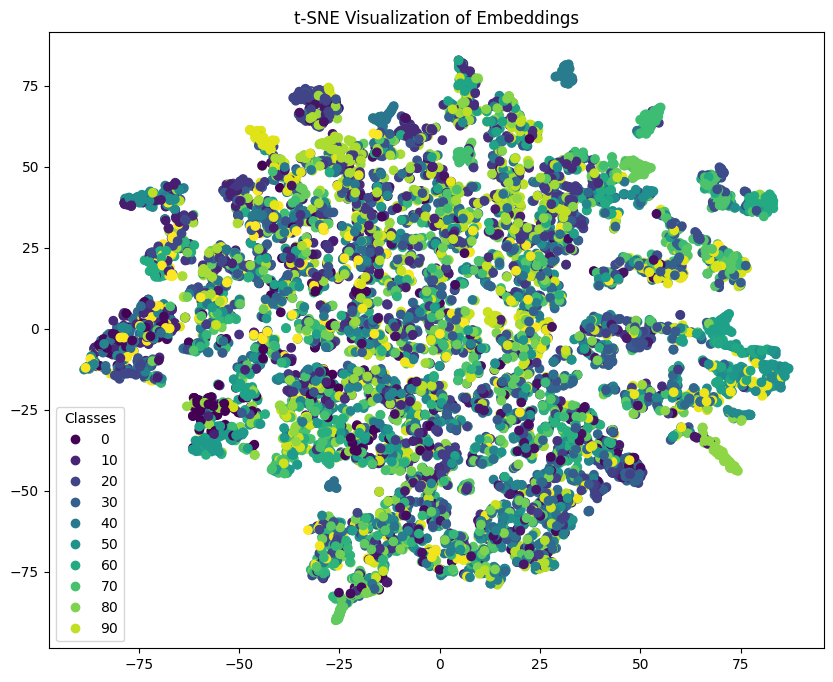

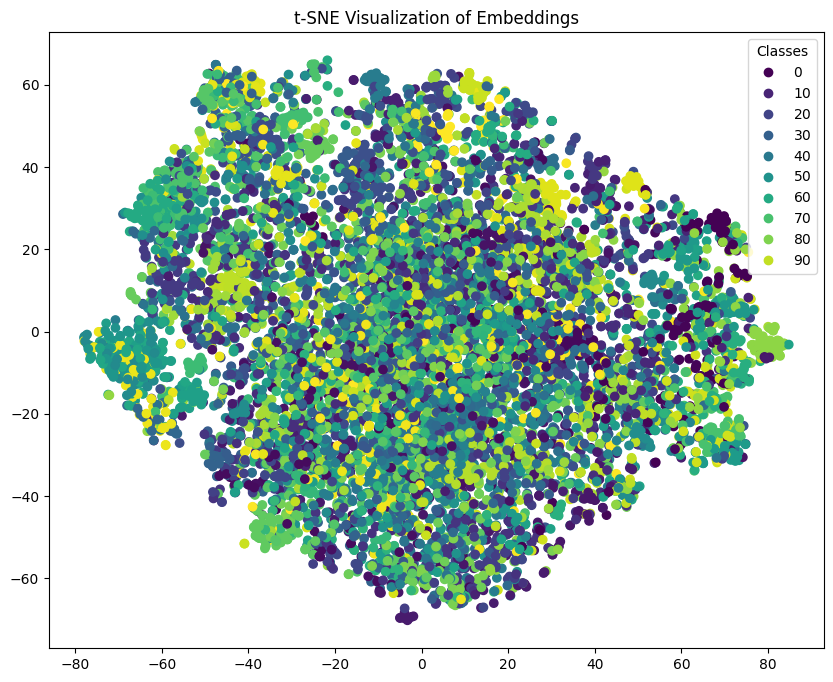

In [27]:
from sklearn.manifold import TSNE

# Extract intermediate layer outputs as embeddings
def extract_embeddings(model, x_data):
    intermediate_layer_model = models.Model(inputs=model.input, outputs=model.layers[-2].output)
    embeddings = intermediate_layer_model.predict(x_data)
    return embeddings

# Perform t-SNE on the embeddings
def visualize_tsne(embeddings, y_data):
    tsne = TSNE(n_components=2, random_state=42)
    tsne_results = tsne.fit_transform(embeddings)

    # Plot the t-SNE results
    plt.figure(figsize=(10, 8))
    scatter = plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=y_data, cmap='viridis')
    plt.legend(*scatter.legend_elements(), title='Classes')
    plt.title('t-SNE Visualization of Embeddings')
    plt.show()

# Extract embeddings from the models
resnet_embeddings = extract_embeddings(resnet_model, x_test)
vgg16_embeddings = extract_embeddings(vgg16_model, x_test)
cnn_model_embeddings = extract_embeddings(cnn_model, x_test)

# Visualize t-SNE for ResNet50 embeddings
visualize_tsne(resnet_embeddings, np.argmax(y_test, axis=1))
# Visualize t-SNE for VGG16 embeddings
visualize_tsne(vgg16_embeddings, np.argmax(y_test, axis=1))
# Visualize t-SNE for CNN  embeddings
visualize_tsne(cnn_model_embeddings, np.argmax(y_test, axis=1))